# Polynominterpolation

In [23]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

## Übersicht

In vielen praktischen Anwendungen werden Polynome als Basisfunktionen der Modellfunktion angenommen. Vorteile von Polynomen:
* Polynome sind leicht zu differenzieren und integrieren
* Annäherung von beliebigen Funktionen durch Polynome möglich, siehe [Taylor-Entwicklung](https://de.wikipedia.org/wiki/Taylorreihe)
* Auswertung ist sehr einfach und dadurch schnell, d.h. sie benötigt nur wenige schnelle arithmetische Operationen (Addition und Multiplikation)

Ein Beispiel für eine Basis aus Polynomen:

$$\sf \phi_1(x)=1,\quad \phi_2(x)=x,\quad \phi_3(x)=x^2,\quad \cdots,\quad \phi_m =x^{m−1} $$


## Polynome

Polynome $\sf P(x)$ sind Funktionen in Form einer Summe von Potenzfunktionen mit natürlichzahligen Exponenten ($\sf x^i, i \in \mathbb{N}$) mit den entsprechenden Koeffzienten $\sf a_i$:

$$\sf P(x) = \sum_{i=0}^n 􏰁a_i x_i = a_n x^n + a_{n−1} x^{n−1} + \cdots + a_2 x_2 + a_1 x + a_0, \quad i, n \in \mathbb{N}, a_i \in \mathbb{R} $$ 

* Als Grad eines Polynoms wird der Term mit dem höchsten Exponenten und nichtverschwindenden Koeffizienten (der sogenannte Leitkoeffizient) bezeichnet.
* Ein Polynom mit Grad $\sf n$ hat $\sf n$, teilweise [komplexe](https://de.wikipedia.org/wiki/Komplexe_Zahl), Nullstellen.

In Python, d.h. im numpy-Modul, werden Polynome durch ihre Koeffizienten representiert. Im allgemeinen wird ein Polynom mit dem Grad $\sf n$ durch folgendes Array dargestellt

```python
[an, ..., a2, a1, a0]
```

So z.B. für $\sf P(x) = x^3 + 5x^2 - 2x + 3$:

In [2]:
P = np.array([1, 5, -2, 3])
print(P)

[ 1  5 -2  3]


Die Auswertung des Polynoms an einem Punkt oder einem Array erfolgt mit der `np.polyval`-Funktion.

In [4]:
x = 1
y = np.polyval(P, x)
print(f"P(x={x}) = {y}")

P(x=1) = 7


In [5]:
x = np.array([-1, 0, 1])
y = np.polyval(P, x)
print(f"P(x={x}) = {y}")

P(x=[-1  0  1]) = [9 3 7]


Für die graphische Darstellung im Bereich $\sf x \in [-6, 2]$ können die bekannten numpy und matplotlib Funktionen verwendet werden.

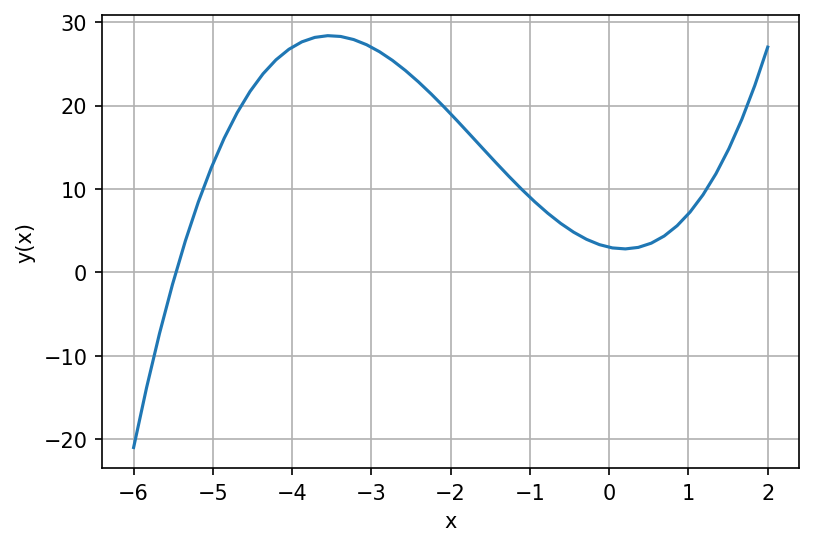

In [12]:
x = np.linspace(-6, 2, 50)
y = np.polyval(P, x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid();

Um die Nullstellen eines Polynoms zu finden, kann die numpy-Funktion `np.roots` genutzt werden. Für das obige Polynom können folgende Nullstellen bestimmt werden. 

In [24]:
nstellen = np.roots(P)

# direkte Ausgabe des Arrays
print("Nullstellen: ")
print(nstellen)

Nullstellen: 
[-5.47+0.j   0.23+0.7j  0.23-0.7j]


In [25]:
print("Nullstellen: ")
# schönere Ausgabe des Arrays
for i, z in enumerate(nstellen):
    if z.imag == 0:
        print(f"  x_{i+1} = {z.real:.2}")
    else:
        print(f"  x_{i+1} = {z.real:.2} {z.imag:+.2}i")

Nullstellen: 
  x_1 = -5.5
  x_2 = 0.23 +0.7i
  x_3 = 0.23 -0.7i


In diesem Beispiel sind zwei der Nullstellen komplex. Eine komplexe Zahl $\sf z$ wird in Python als Summe des Realanteils ($\sf Re$) und Imaginärteils ($\sf Im$). Letzterer wird durch ein nachfolgendes `j`, die imaginäre Einheit, gekennzeichnet.

$$\sf z = Re(z) + Im(z)j$$

Die Nullstellen können auch zur alternativen Darstellung des Polynoms verwendet werden. Sind $\sf x_i$ die $\sf n$ Nullstellen, so ist das Polynom $\sf n$-ten Grades durch folgendes Produkt beschrieben:

$$\sf P(x) = \prod_{i=1}^n \left(x - x_i\right) = (x - x_1)\cdot (x - x_2) \cdot \cdots \cdot (x - x_n) $$ 

Seien beispielsweise 1 und 2 die Nullstellen eines Polynoms, so lautet dieses:

$$ \sf P(x) = (x - 1)(x - 2) = x^2 - 3x +2 $$

Die numpy-Funktion `np.poly` kann aus den Nullstellen die Polynomkoeffizienten bestimmen. Anhand des obigen Beispiels lautet der Funktionsaufruf: 

In [26]:
nstellen = [1, 2]
koeffizienten = np.poly(nstellen)

print("Nullstellen:", nstellen)
print("Koeffizienten:", koeffizienten)

Nullstellen: [1, 2]
Koeffizienten: [ 1. -3.  2.]


Das Modul numpy stellt viele praktische Funktionen zum Umgang mit Polynomen zur Verfügung. So existieren Funktionen um Polynome auszuwerten, die Nullstellen zu finden, zu addieren, zu multiplizieren, abzuleiten oder zu integrieren. Eine Übersicht ist in der [numpy-Dokumentation](https://numpy.org/doc/stable/reference/routines.polynomials.poly1d.html) gegeben.

## Interplation